### Teleco customer churn prediction model


"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]


Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:
Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents



In [1]:
import numpy as np
import pandas as pd 

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import lightgbm as lgb
from sklearn.model_selection import train_test_split

import scipy as sc
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn import preprocessing
from sklearn.compose import make_column_transformer
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/ML Learning csv/Telco-Customer-Churn.csv")

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 2. Inspecting the customers
The features available for churn analysis are <code>customerID</code>, <code>gender</code>, <code>seniorcitizen</code>, <code>Partner</code>, <code>Dependents</code>, <code>tenure</code>, <code>PhoneService</code>, <code>MultipleLines</code>, <code>InternetServices</code>, <code>OnlineSecurity</code>, <code>OnlineBackup</code>, <code>DeviceProtection</code>, <code>TechSupport</code>, <code>StreamingTV</code>, <code>Contract</code>, <code>PaymentMethod</code> <code>MonthlyCharges</code>. <code>TotalCharges</code>. <code>Churn</code>  <code>StreamingMethod</code>. 

<p>As we can see from our first glance at the data, the dataset has a mixture of numerical and non-numerical features.

In [5]:
# Print summary statistics
df_description = df.describe()
print(df_description)

print("\n")

# Print DataFrame information
df_info = df.info()
print(df_info)

print("\n")

# Inspect missing values in the dataset
df.tail(17)

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7026,8775-CEBBJ,Female,0,No,No,9,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes
7027,0550-DCXLH,Male,0,No,No,13,Yes,No,DSL,No,...,No,Yes,Yes,Yes,Month-to-month,No,Mailed check,73.35,931.55,No
7028,9281-CEDRU,Female,0,Yes,No,68,Yes,No,DSL,No,...,No,Yes,Yes,No,Two year,No,Bank transfer (automatic),64.10,4326.25,No
7029,2235-DWLJU,Female,1,No,No,6,No,No phone service,DSL,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,44.40,263.05,No
7030,0871-OPBXW,Female,0,No,No,2,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.05,39.25,No
7031,3605-JISKB,Male,1,Yes,No,55,Yes,Yes,DSL,Yes,...,No,No,No,No,One year,No,Credit card (automatic),60.00,3316.1,No
7032,6894-LFHLY,Male,1,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes
7033,9767-FFLEM,Male,0,No,No,38,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7035,8456-QDAVC,Male,0,No,No,19,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.1,No


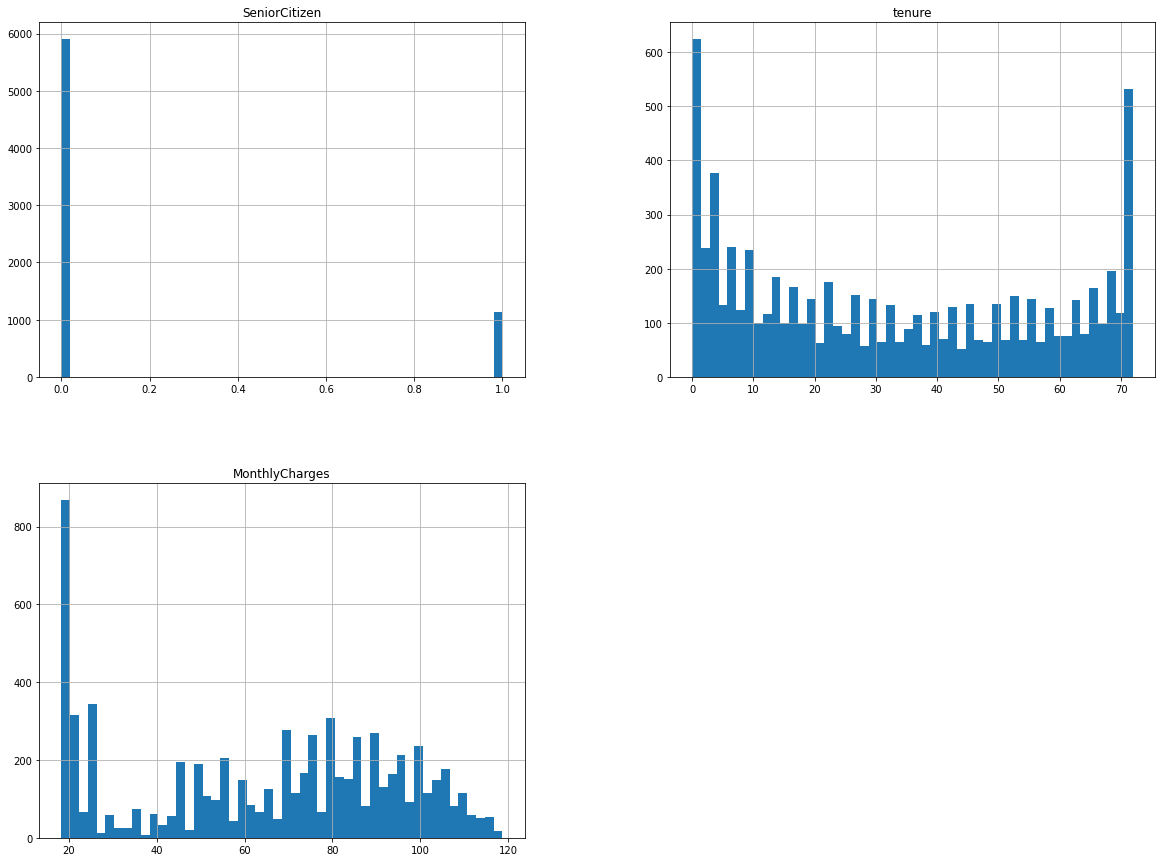

In [6]:
#plot a histogram for each numerical attribute
%matplotlib inline  
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

## 3. Handling the missing values
<p>Most data sets have missing values which affect the performance of our machine learning model(s) if they go unchanged:</p>

<p>Now, let's temporarily replace these missing value question marks with NaN.</p>

In [7]:
# Import numpy
import numpy as np
# Inspect missing values in the dataset
print(df.tail(17))

# Replace the '?'s with NaN
df = df.replace('?', np.NaN)

# Inspect the missing values again
df.tail(17)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
7026  8775-CEBBJ  Female              0      No         No       9   
7027  0550-DCXLH    Male              0      No         No      13   
7028  9281-CEDRU  Female              0     Yes         No      68   
7029  2235-DWLJU  Female              1      No         No       6   
7030  0871-OPBXW  Female              0      No         No       2   
7031  3605-JISKB    Male              1     Yes         No      55   
7032  6894-LFHLY    Male              1      No         No       1   
7033  9767-FFLEM    Male              0      No         No      38   
7034  0639-TSIQW  Female              0      No         No      67   
7035  8456-QDAVC    Male              0      No         No      19   
7036  7750-EYXWZ  Female              0      No         No      12   
7037  2569-WGERO  Female              0      No         No      72   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Fe

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7026,8775-CEBBJ,Female,0,No,No,9,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes
7027,0550-DCXLH,Male,0,No,No,13,Yes,No,DSL,No,...,No,Yes,Yes,Yes,Month-to-month,No,Mailed check,73.35,931.55,No
7028,9281-CEDRU,Female,0,Yes,No,68,Yes,No,DSL,No,...,No,Yes,Yes,No,Two year,No,Bank transfer (automatic),64.10,4326.25,No
7029,2235-DWLJU,Female,1,No,No,6,No,No phone service,DSL,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,44.40,263.05,No
7030,0871-OPBXW,Female,0,No,No,2,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.05,39.25,No
7031,3605-JISKB,Male,1,Yes,No,55,Yes,Yes,DSL,Yes,...,No,No,No,No,One year,No,Credit card (automatic),60.00,3316.1,No
7032,6894-LFHLY,Male,1,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes
7033,9767-FFLEM,Male,0,No,No,38,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7035,8456-QDAVC,Male,0,No,No,19,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.1,No


In [8]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Upon further investigation, the dataset has no missing data which is rare but allows us to continue with our analysis

## 4. Preprocessing the data (part i)
<p>There is still some minor but essential data preprocessing needed before we proceed towards building our machine learning model.

In [9]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
le=LabelEncoder()

# Iterate over all the values of each column and extract their dtypes
for col in df.columns.values:
    # Compare if the dtype is object
    if df[col].dtype=='object':
    # Use LabelEncoder to do the numeric transformation
        df[col]=le.fit_transform(df[col])

In [10]:
from sklearn.feature_selection import SelectKBest, chi2, f_regression

In [11]:
# Create the object for SelectKBest and fit and transform the classification data
# k is the number of features you want to select [here it's 14]
bestfeatures = SelectKBest(score_func=chi2, k=14)

In [12]:
# Create feature and target variable for Classification problem
#From here we shall select the best 11 variables and drop 2
X_class=df.iloc[:,0:19]
X_class= df.drop('Churn', axis=1)

In [13]:
y_class = df['Churn']

In [14]:
fit=bestfeatures.fit(X_class,y_class)

In [15]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_class.columns)

In [16]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)

In [17]:
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(14,'Score'))  #print 14 best features

               Specs         Score
5             tenure  16278.923685
18    MonthlyCharges   3680.787699
0         customerID   2516.968803
19      TotalCharges   1616.483021
15          Contract   1115.780167
9     OnlineSecurity    551.611529
12       TechSupport    523.303866
10      OnlineBackup    230.086520
11  DeviceProtection    191.303140
2      SeniorCitizen    134.351545
4         Dependents    133.036443
16  PaperlessBilling    105.680863
3            Partner     82.412083
17     PaymentMethod     58.492250


In [18]:
# Best features include:tenure,MonthlyCharges,customerID,TotalCharges,Contract,OnlineSecurity,TechSupport,OnlineBackup,DeviceProtection,SeniorCitizen,Dependents,PaperlessBilling,Partner,PaymentMethod     

In [19]:
print(X_class[:5])

   customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0        5375       0              0        1           0       1   
1        3962       1              0        0           0      34   
2        2564       1              0        0           0       2   
3        5535       1              0        0           0      45   
4        6511       0              0        0           0       2   

   PhoneService  MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0             0              1                0               0             2   
1             1              0                0               2             0   
2             1              0                0               2             2   
3             0              1                0               2             0   
4             1              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0   

In [20]:
df = df.drop(columns=['InternetService','MultipleLines','StreamingMovies','StreamingTV','gender'])
df = df.values


Proposed approach

1. Potential techniques - What different techniques should be explored?

    This is a classification problem where the aim of the exercise is to predict, recognize and group applicants into two buckets (i.e 1 or 0) that represent customers that are likely to churn or those willing to continue with our service.
    Popular classification algorithms include Logistic Regression, XG Boost, Decision Tree, Support Vector Machines, etc. These algorithms are used to develop models based on training data to be used to predict the likelihood that subsequent data points will fall into predetermined categories.

2. Overall solution design - What is the potential solution design?

    The solution is to split the data into a train and test set with preferrably a 67-33 split between train and test sets. The classification model will be trained on the train set to build a model with high enough predictive power. The accuracy of the model is tested on the test set and recalibrated until the accuracy is high enough and acceptable.

3. Measures of success - What are the key measures of success?

    The success of this model will be measured by having a high Recall score. The greater the Recall score, higher the chances of minimizing False Negatives.

    If we fail to predict the people who will churn, it would cost Teleco a lot of money and it would be a prudent to higlight potential churners even if there is slight doubt.



## 5. Splitting the dataset into train and test sets
<p>We have successfully converted all the non-numeric values to numeric ones.</p>
<p>Now, we will split our data into train set and test set to prepare our data for two different phases of machine learning modeling: training and testing. Ideally, no information from the test data should be used to scale the training data or should be used to direct the training process of a machine learning model. Hence, we first split the data and then apply the scaling.

In [21]:
# Import train_test_split
from sklearn.model_selection import train_test_split


# Segregate features and labels into separate variables
X,y = df[:,0:14] , df[:,15]

#X- These are our features 
#Y-This is the target variable

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)

## 6. Preprocessing the data (part ii)
<p>Now, let's try to understand what these scaled values mean in the real world. Let's use <code>CreditScore</code> as an example. The credit score of a person is their creditworthiness based on their credit history. The higher this number, the more financially trustworthy a person is considered to be. So, a <code>CreditScore</code> of 1 is the highest since we're rescaling all the values to the range of 0-1.</p>

In [22]:
# Import MinMaxScaler
from sklearn.preprocessing import  MinMaxScaler

# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.fit_transform(X_test)

## 9. Fitting a logistic regression, LGBM, XG Boost model to the train set
<p>Essentially, predicting if a customer will churn or not is a <a href="https://en.wikipedia.org/wiki/Statistical_classification">classification</a> task.Our dataset contains more instances for customers who " did not churn"  than those who "churned". Specifically, out of 7043 instances, there are 5174 (73.4%) who did not churn and 1869 (26.5%) customers that churned. </p>

<p>Which model we pick will depend on the performance affecting training and fitting the data

In [23]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression()

# Fit logreg to the train set
logreg.fit(rescaledX_train,y_train)

LogisticRegression()

In [24]:
#Fitting LGBM

import lightgbm as lgb
clf = lgb.LGBMClassifier()


# Fit logreg to the train set
clf.fit(rescaledX_train,y_train)

LGBMClassifier()

In [25]:
#Fitting XGB

from xgboost import XGBClassifier
clf2 = XGBClassifier()

# Fit logreg to the train set
clf2.fit(rescaledX_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

## 10. Making predictions and evaluating performance
<p>But how well does our model perform? </p>
<p>We will now evaluate our model on the test set with respect to <a href="https://developers.google.com/machine-learning/crash-course/classification/accuracy">classification accuracy</a>. But we will also take a look the model's <a href="http://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/">confusion matrix</a>. In the case of predicting customer churn, it is equally important to see if our machine learning model is able to predict the customers that churn as those who originally churned. 

In this case we shall evaluate the model using different classifiers

In [26]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Use logreg to predict instances from the test set and store it
y_pred = logreg.predict(rescaledX_test)

# Get the accuracy score of logreg model and print it
print("Accuracy of logistic regression classifier: ", logreg.score(rescaledX_test, y_test))

# Print the confusion matrix of the logreg model
print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test,y_pred))

Accuracy of logistic regression classifier:  0.8124731182795699
[[1532  165]
 [ 271  357]]
              precision    recall  f1-score   support

         0.0       0.85      0.90      0.88      1697
         1.0       0.68      0.57      0.62       628

    accuracy                           0.81      2325
   macro avg       0.77      0.74      0.75      2325
weighted avg       0.80      0.81      0.81      2325



In [27]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Use LGBM to predict instances from the test set and store it
y_pred = clf.predict(rescaledX_test)

# Get the accuracy score of LGBM model and print it
print("Accuracy of LGBM classifier: ", clf.score(rescaledX_test, y_test))

# Print the confusion matrix of the lgbmmodel
print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test,y_pred))

Accuracy of LGBM classifier:  0.8051612903225807
[[1534  163]
 [ 290  338]]
              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87      1697
         1.0       0.67      0.54      0.60       628

    accuracy                           0.81      2325
   macro avg       0.76      0.72      0.74      2325
weighted avg       0.80      0.81      0.80      2325



In [28]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Use XG to predict instances from the test set and store it
y_pred = clf2.predict(rescaledX_test)

# Get the accuracy score of XG model and print it
print("Accuracy of XGBClassifier: ", clf2.score(rescaledX_test, y_test))

# Print the confusion matrix of the XG model
print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test,y_pred))

Accuracy of XGBClassifier:  0.7948387096774193
[[1517  180]
 [ 297  331]]
              precision    recall  f1-score   support

         0.0       0.84      0.89      0.86      1697
         1.0       0.65      0.53      0.58       628

    accuracy                           0.79      2325
   macro avg       0.74      0.71      0.72      2325
weighted avg       0.79      0.79      0.79      2325



## 11. Model performance
<p>Our best model has an accuracy score of over 81%.</p>



    TP (True Positive) means that we Correctly predicted the Customer would stay. (Desirable Result)
    TN (True Negative) means that we Correctly predicted the Customer to churn. (Most Desirable Result)
    FP (False Positive) means that we Wrongly predicted the Customer churn. They were actually Non-churners. (False Alarm)
    FN (False Negative) means that we Wrongly predicted the Customer as a Non-churner. (Most Undesirable Result / Worst Result)

Conclusions

Insights: 

The most important measure of success for this problem is recall on the test set.

The model that will give us the best results is the logistic regression classifier. This model has an accuracy of 81.2% however accuracy does not tell the whole picture.I will explain further below.

The features with the most importance to the model are;

* Tenure-The applicants with a longer tenure have lower chances of defaulting.
* MonthlyCharges-The applicants with a high monthly charges have a higher chance of churning than the ones with lower charges.
* CustomerID- Newer customers have a higher chance of churning than older ones
* TotalCharges-The applicants with a high total charges have a higher chance of churning


2. Comparison of various techniques and their relative performance.Which one is performing relatively better? Is there scope to improve the performance further?

    The best performing model for this business case is logistic regression classifier(performance- 81.24%) because it maximises our ability of getting true negatives while ensuring the false positives are not high.

    The model can be improved with further tuning of the model. Prunning the model could also return better results.

3. Proposal for the final solution design - What model do you propose to be adopted? Why is this the best solution to adopt?

    I propose the logistic regression classifier to be adopted for the final solution design as it will help us minimize the potential of having higher churn customers.
    This model gives us a well balanced model for recall with 57% of the churners = 1 i.e the model has the highest ability to minimize false negatives while maximizing those that will not churn =0.(at 90%)
    The precision of this model is 85% for customers who didn't churn while it's 68% for those that churned. The model has an accuracy of 81% meaning that the model makes predicts both churners and Non-churners 81% of the time.

